In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
file_path = "cab_rides.csv"  # Use the correct path if file is elsewhere
sample_df = pd.read_csv(file_path, nrows=50000)


In [ ]:
# Drop missing prices and explicitly create a new DataFrame copy
sample_df_cleaned = sample_df.dropna(subset=['price']).copy()

# Safely add new columns using .loc
sample_df_cleaned.loc[:, 'datetime'] = pd.to_datetime(sample_df_cleaned['time_stamp'], unit='ms')
sample_df_cleaned.loc[:, 'hour'] = sample_df_cleaned['datetime'].dt.hour
sample_df_cleaned.loc[:, 'day_of_week'] = sample_df_cleaned['datetime'].dt.dayofweek



In [ ]:
sns.set(style="whitegrid")


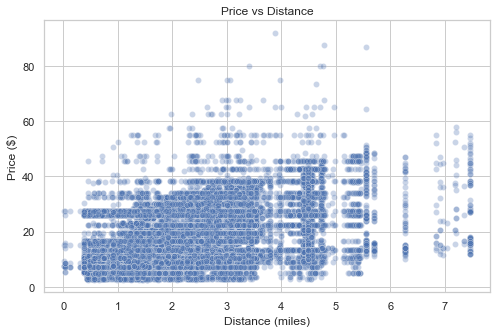

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='distance', y='price', data=sample_df_cleaned, alpha=0.3)
plt.title("Price vs Distance")
plt.xlabel("Distance (miles)")
plt.ylabel("Price ($)")
plt.show()


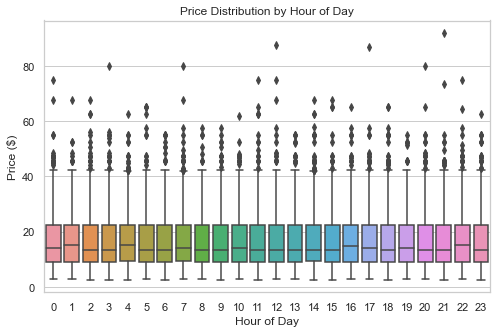

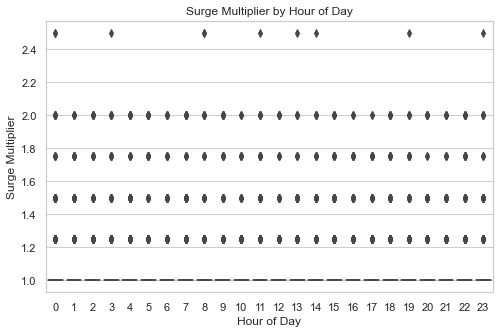

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='hour', y='surge_multiplier', data=sample_df_cleaned)
plt.title("Surge Multiplier by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Surge Multiplier")
plt.show()


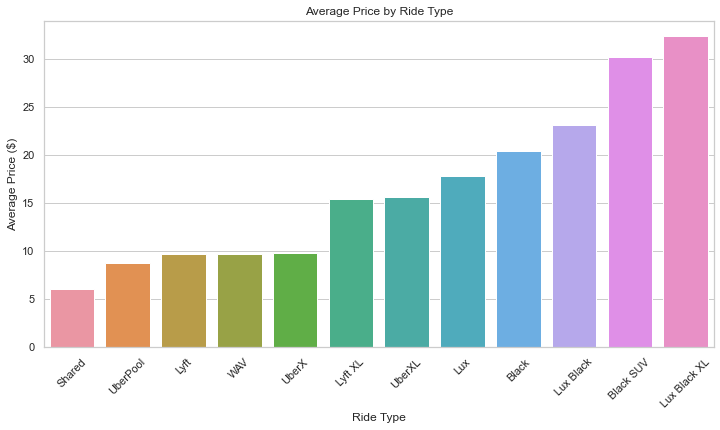

In [ ]:
plt.figure(figsize=(12, 6))
avg_price_by_name = sample_df_cleaned.groupby('name')['price'].mean().sort_values()
sns.barplot(x=avg_price_by_name.index, y=avg_price_by_name.values)
plt.title("Average Price by Ride Type")
plt.xlabel("Ride Type")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.show()
